**‰∏Ä„ÄÅËºâÂÖ•Â•ó‰ª∂**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

‰∏≠ÊñáÂ≠óÈ´î

In [ ]:
# @title
# Ë£úcolab‰∏≠ÊñáÂ≠óÈ´î
!apt-get update -y
!apt-get install -y fonts-noto-cjk

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,605 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,700 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jam

In [ ]:
# @title
# ÊåáÂÆöÂ≠óÈ´îÊ™îË∑ØÂæë
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'
font_prop = fm.FontProperties(fname=font_path, size=14)

**‰∫å„ÄÅÈÄ£Êé•Èõ≤Á´Ø**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Áõ£Áù£ÂºèkidneyDisease/kidney_disease.csv'
df = pd.read_csv(file_path)

**‰∏â„ÄÅË≥áÊñôËôïÁêÜ**

In [ ]:
# ÂéªÊéâÊ¨Ñ‰ΩçÂêçÁ®±ÁöÑÂâçÂæåÁ©∫ÁôΩ
df.columns = df.columns.str.strip()

# ÁúãÊØèÊ¨ÑÁº∫Â§±ÂÄºÊï∏Èáè
print(df.isnull().sum())

# ËôïÁêÜ target Ê¨Ñ
target_col = 'Chronic Kidney Disease: yes'
df[target_col] = pd.to_numeric(df[target_col], errors='coerce')

# Êï∏ÂÄºÂåñ + Ë£úÂÄº
df = df.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.dtype == 'object' else col) #Ê¨Ñ‰Ωç->Êï∏Â≠ó
df.fillna(df.mean(numeric_only=True), inplace=True)

# ÁßªÈô§Â§™Âº∑ÁöÑÁâπÂæµÔºàÊ¥©ÊºèÈ¢®Èö™Ôºâ
drop_cols = ['Hemoglobin (gms)', 'Specific Gravity', 'Packed Cell Volume','Serum Creatinine (mgs/dL)','Red Blood Cells (millions/cmm)'] #ÁßªÈô§Ê¨äÁ®ÆÈÅéÂçäÁöÑ
df = df.drop(columns=drop_cols)

Age (yrs)                         0
Blood Pressure (mm/Hg)            0
Specific Gravity                  0
Albumin                           0
Sugar                             0
Blood Glucose Random (mgs/dL)     0
Blood Urea (mgs/dL)               0
Serum Creatinine (mgs/dL)         0
Sodium (mEq/L)                    0
Potassium (mEq/L)                 0
Hemoglobin (gms)                  0
Packed Cell Volume                0
White Blood Cells (cells/cmm)     0
Red Blood Cells (millions/cmm)    0
Red Blood Cells: normal           0
Pus Cells: normal                 0
Pus Cell Clumps: present          0
Bacteria: present                 0
Hypertension: yes                 0
Diabetes Mellitus: yes            0
Coronary Artery Disease: yes      0
Appetite: poor                    0
Pedal Edema: yes                  0
Anemia: yes                       0
Chronic Kidney Disease: yes       0
dtype: int64


**Âõõ„ÄÅÊ®°ÂûãË≥áÊñôËº∏ÂÖ•**

In [ ]:
# ÁâπÂæµ/Ê®ôÁ±§
X = df.drop(columns=[target_col])
y = df[target_col]

# Ë≥áÊñôÂàáÂàÜÔºàÂä†ÂÖ• stratifyÔºâ
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Ê®ôÊ∫ñÂåñ
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Ê±∫Á≠ñÊ®πÂ±§Êï∏Âà§Êñ∑**

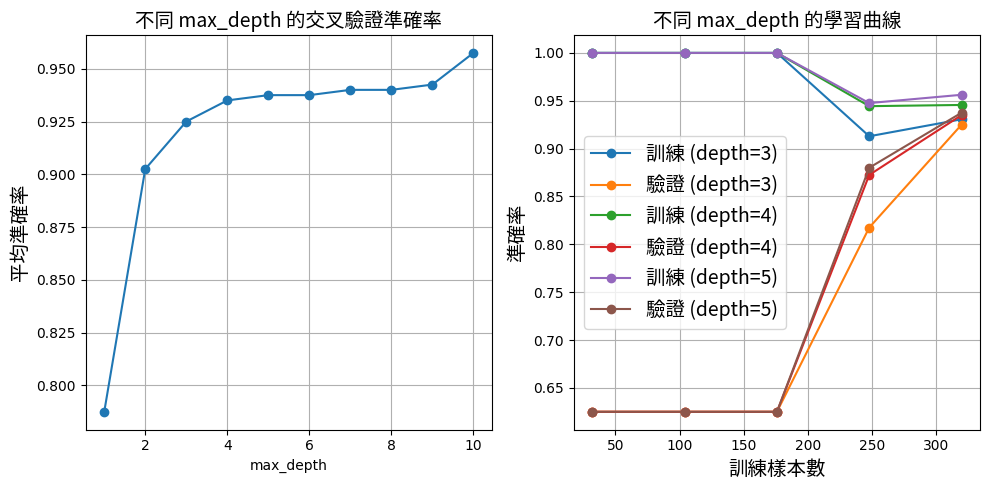

In [ ]:
# Ê∏¨Ë©¶ÁöÑÊ®πÊ∑±Â∫¶ÁØÑÂúç
depth_range = range(1, 11)
cv_scores = []

# Ê∏¨Ë©¶‰∏çÂêåÊ∑±Â∫¶ÁöÑÊ®°ÂûãË°®Áèæ (‰ΩøÁî®ËôïÁêÜÂæåÁöÑÂØ¶ÈöõË≥áÊñô X Âíå y)
for depth in depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Áπ™Ë£Ω‰∏çÂêåÊ∑±Â∫¶ÁöÑ‰∫§ÂèâÈ©óË≠âÂàÜÊï∏
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(depth_range, cv_scores, marker='o')
plt.title("‰∏çÂêå max_depth ÁöÑ‰∫§ÂèâÈ©óË≠âÊ∫ñÁ¢∫Áéá", fontproperties=font_prop)
plt.xlabel("max_depth")
plt.ylabel("Âπ≥ÂùáÊ∫ñÁ¢∫Áéá", fontproperties=font_prop)
plt.grid(True)

# Áπ™Ë£Ω‰∏çÂêå max_depth ÁöÑÂ≠∏ÁøíÊõ≤Á∑ö
plt.subplot(1, 2, 2)
for depth in [3, 4, 5]:  # ÈÅ∏ÊìáÂπæÂÄã‰Ω†ÊÑüËààË∂£ÁöÑÊ∑±Â∫¶ÈÄ≤Ë°åÊØîËºÉ
    train_sizes, train_scores, test_scores = learning_curve(
        DecisionTreeClassifier(max_depth=depth, random_state=42),
        X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy'
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_scores_mean, 'o-', label=f"Ë®ìÁ∑¥ (depth={depth})")
    plt.plot(train_sizes, test_scores_mean, 'o-', label=f"È©óË≠â (depth={depth})")

plt.title("‰∏çÂêå max_depth ÁöÑÂ≠∏ÁøíÊõ≤Á∑ö", fontproperties=font_prop)
plt.xlabel("Ë®ìÁ∑¥Ê®£Êú¨Êï∏", fontproperties=font_prop)
plt.ylabel("Ê∫ñÁ¢∫Áéá", fontproperties=font_prop)
plt.legend(prop=font_prop)
plt.grid(True)

plt.tight_layout()
plt.show()

**‰∫î„ÄÅÂª∫Á´ãÊ®°Âûã**

In [ ]:
# Ê®°ÂûãÂª∫Êßã
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

roc_data = {}
accuracies = {}
# Ë®ìÁ∑¥‰∏ÄÊ£µÊ±∫Á≠ñÊ®π
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
# Ê®°ÂûãË®ìÁ∑¥ + Ë©ï‰º∞
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)

    accuracies[name] = acc
    roc_data[name] = {'fpr': fpr, 'tpr': tpr, 'auc': auc_score}

#Âª∫Á´ãËàáË®ìÁ∑¥Ê®°Âûã
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**ÂÖ≠„ÄÅÂèñÂæóË≥áÊñôÁâπÂæµÈáçË¶ÅÊÄßÔºàÁôºÁèæÊ¨äÈáçÈÅéÂçäÊ¨Ñ‰ΩçÂâáÂõûÂà∞‰∏â„ÄÅÂà™Èô§Ë©≤Ê¨Ñ‰ΩçÔºâ **


üìä ÁâπÂæµÈáçË¶ÅÊÄßËàá‰ΩîÊØîÔºö
                               ÁâπÂæµ       ÈáçË¶ÅÊÄß     ‰ΩîÊØî (%)
0                         Albumin  0.410526  41.052632
1          Diabetes Mellitus: yes  0.236227  23.622693
2               Hypertension: yes  0.086580   8.658009
3                  Appetite: poor  0.057971   5.797101
4             Blood Urea (mgs/dL)  0.045018   4.501781
5          Blood Pressure (mm/Hg)  0.041531   4.153147
6   Blood Glucose Random (mgs/dL)  0.039480   3.947970
7   White Blood Cells (cells/cmm)  0.033144   3.314436
8               Potassium (mEq/L)  0.019009   1.900855
9                Pedal Edema: yes  0.012190   1.219048
10              Pus Cells: normal  0.011999   1.199850
11                      Age (yrs)  0.006325   0.632479
12        Red Blood Cells: normal  0.000000   0.000000
13                          Sugar  0.000000   0.000000
14                 Sodium (mEq/L)  0.000000   0.000000
15       Pus Cell Clumps: present  0.000000   0.000000
16              B

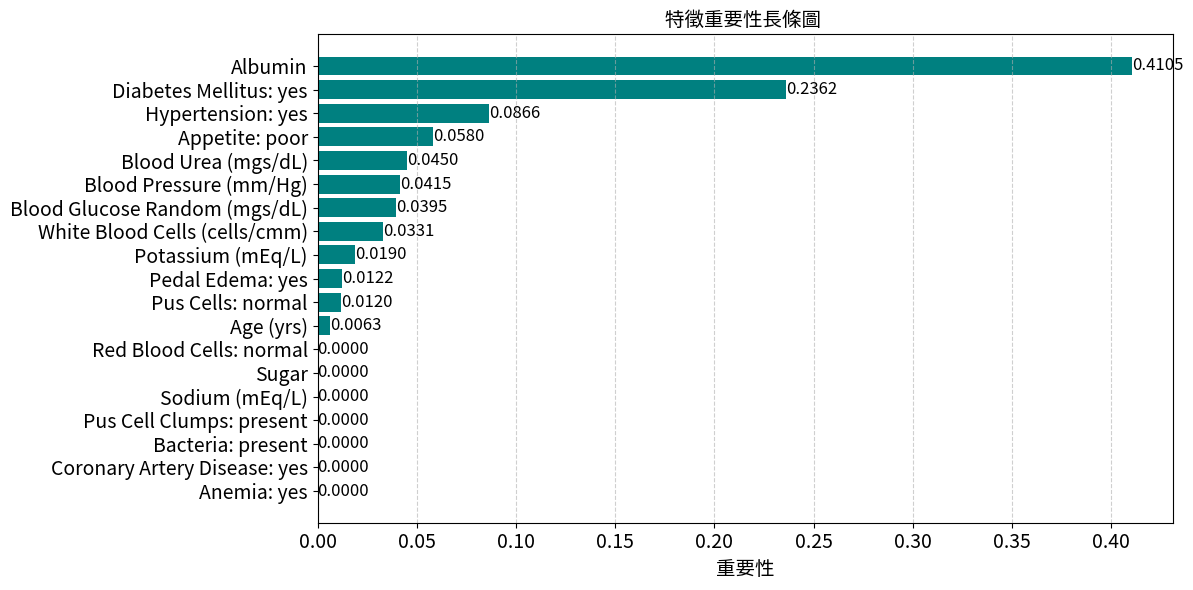

In [ ]:
# ÂèñÂæóÁâπÂæµÈáçË¶ÅÊÄß
feature_importances = model.feature_importances_

# Êï¥ÁêÜÊàê DataFrame, ‰ΩøÁî® X_dropped.columns ‰æÜÁ¢∫‰øùÈï∑Â∫¶‰∏ÄËá¥
importance_df = pd.DataFrame({
    'ÁâπÂæµ':  X.columns,  # ÊîπÁî® X_dropped.columnsÔºåËàá feature_importances Èï∑Â∫¶‰∏ÄËá¥
    'ÈáçË¶ÅÊÄß': feature_importances
})

# ÊéíÂ∫è
importance_df = importance_df.sort_values(by='ÈáçË¶ÅÊÄß', ascending=False).reset_index(drop=True)

# Ë®àÁÆóÁ∏ΩÈáçË¶ÅÊÄß‰ΩîÊØî
total_importance = importance_df['ÈáçË¶ÅÊÄß'].sum()
importance_df['‰ΩîÊØî (%)'] = (importance_df['ÈáçË¶ÅÊÄß'] / total_importance) * 100

# È°ØÁ§∫ÁµêÊûú
print("\nüìä ÁâπÂæµÈáçË¶ÅÊÄßËàá‰ΩîÊØîÔºö")
print(importance_df)

# ÂéªÈô§ÂâçÂÖ©Âêç (Â¶ÇÊûúÈúÄË¶Å)
# importance_df = importance_df.iloc[2:].reset_index(drop=True)

# Áï´Èï∑Ê¢ùÂúñ
plt.figure(figsize=(12, 6))
bars = plt.barh(importance_df['ÁâπÂæµ'], importance_df['ÈáçË¶ÅÊÄß'], color='teal')

# Ê®ô‰∏äÊ®ôÈ°åË∑üXËª∏ÊñáÂ≠ó
plt.xlabel('ÈáçË¶ÅÊÄß',fontproperties=font_prop)
plt.title('ÁâπÂæµÈáçË¶ÅÊÄßÈï∑Ê¢ùÂúñ ', fontproperties=font_prop)

# ÂèçÈÅé‰æÜÈ°ØÁ§∫ÔºåÊúÄÂ§ßÂú®‰∏äÈù¢
plt.gca().invert_yaxis()

# Âä†‰∏äÊ©´Á∑ö
plt.grid(axis='x', linestyle='--', alpha=0.6)

# ÊØèÂÄãÈï∑Ê¢ùÊóÅÈÇäÂä†‰∏äÊï∏ÂÄº
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.4f}',  # Â∞èÊï∏ÈªûÂæåÂõõ‰Ωç
             va='center', ha='left', fontproperties=font_prop, fontsize=12)

# Ë®≠ÂÆö‰∏≠ÊñáÂ≠óÂûã
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)

# ËÆìÂúñ‰∏çÊúÉË∑ëÊéâ
plt.tight_layout()

# È°ØÁ§∫Âúñ
plt.show()

**‰∏É„ÄÅÁï´Âúñ**

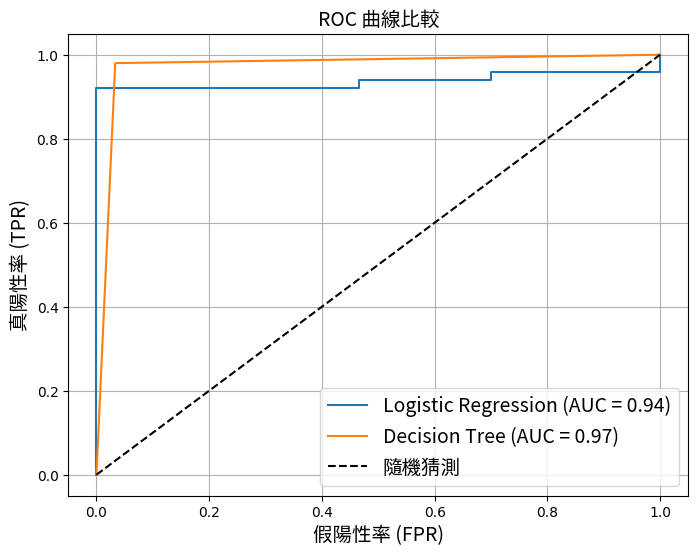

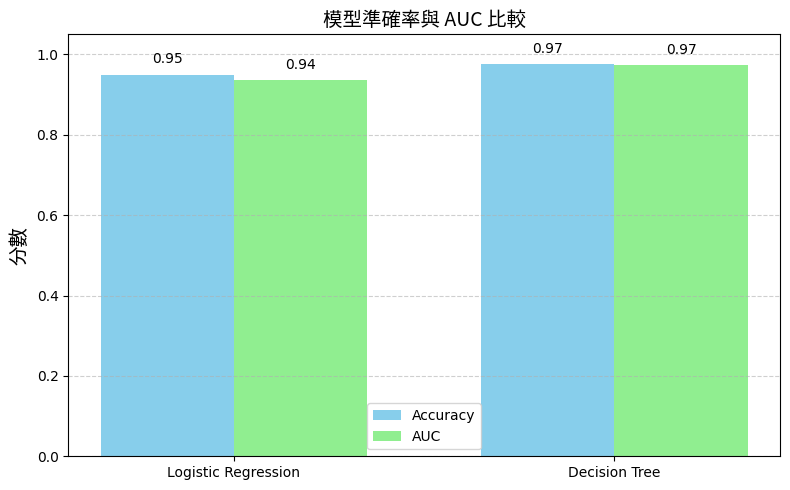

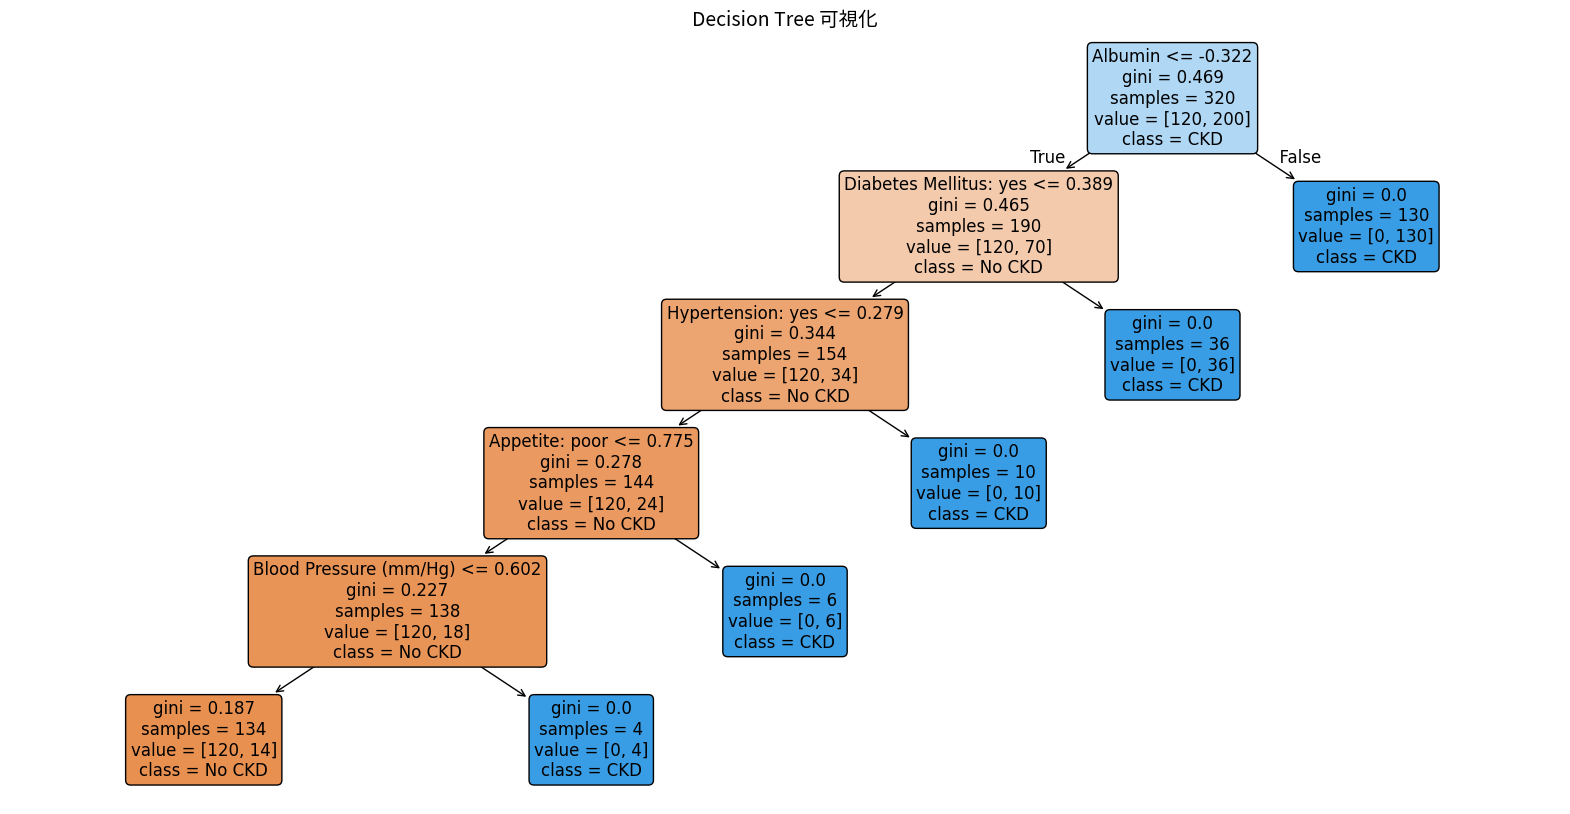

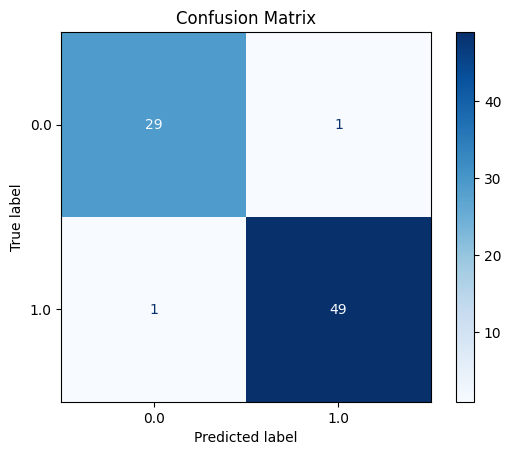

In [ ]:
# === ROC Êõ≤Á∑öÂúñ ===
plt.figure(figsize=(8, 6))
for name, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], label=f"{name} (AUC = {data['auc']:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Èö®Ê©üÁåúÊ∏¨')
plt.xlabel('ÂÅáÈôΩÊÄßÁéá (FPR)',fontproperties=font_prop)
plt.ylabel('ÁúüÈôΩÊÄßÁéá (TPR)',fontproperties=font_prop)
plt.title('ROC Êõ≤Á∑öÊØîËºÉ',fontproperties=font_prop)
plt.legend(loc='lower right',prop=font_prop)
plt.grid(True)
plt.show()
# === Ê∫ñÁ¢∫Áéá + AUC Èï∑Ê¢ùÂúñ ===
labels = list(models.keys())
acc_vals = [accuracies[name] for name in labels]
auc_vals = [roc_data[name]['auc'] for name in labels]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, acc_vals, width, label='Accuracy', color='skyblue')
rects2 = ax.bar(x + width/2, auc_vals, width, label='AUC', color='lightgreen')

ax.set_ylabel('ÂàÜÊï∏',fontproperties=font_prop)
ax.set_title('Ê®°ÂûãÊ∫ñÁ¢∫ÁéáËàá AUC ÊØîËºÉ',fontproperties=font_prop)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.05)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Âä†‰∏äÊï∏ÂÄºÊ®ôÁ±§
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.02,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

#Áï´Ê±∫Á≠ñÊ®π
plt.figure(figsize=(20, 10))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=['No CKD', 'CKD'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree ÂèØË¶ñÂåñ",fontproperties=font_prop)
plt.show()



#È†êÊ∏¨ËàáÊ∑∑Ê∑ÜÁü©Èô£
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

===================Ê∏¨Ë©¶ÂæÖÊï¥ÁêÜ===========================
